In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
# Get all the tickers of S&P 100 from Wikipedia

url = 'https://en.wikipedia.org/wiki/S%26P_100'
response = requests.get(url)

if response.status_code == 200:
    parsed_data = BeautifulSoup(response.content, 'html.parser')
    
    table = parsed_data.find('table', {'id': 'constituents'})
    
    if table:
        sn_p100 = [row.find_all('td')[0].get_text(strip=True) for row in table.find_all('tr') if row.find_all('td')]
    else:
        print("Table not found.")
else:
    print(f"Failed to fetch. Status code: {response.status_code}")

sn_p100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [3]:
# Correct ticker name for Berkshire Hathaway

i = sn_p100.index('BRK.B')
sn_p100[i] = 'BRK-B'
sn_p100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [4]:
# Function for preprocessing data of a single ticker to desired format of Zipline

def preprocess(data):
    data.reset_index(inplace=True)
    data.drop(columns=['Adj Close'], inplace=True)
    data.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', }, inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['volume'] = data['volume'].astype('float64')
    data.sort_values(by='timestamp', inplace=True)
    data.reset_index(drop=True, inplace=True)

    return data

In [5]:
# # Fetching historical data for each ticker in S&P100

# start_date = '2010-01-01'
# end_date = '2021-07-31'

# snp100_data_dict = {}

# for ticker in sn_p100:
#     data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
#     preprocess(data).to_csv(f'/home/yakub/Documents/Python/SnP100/Daily/{ticker}.csv', index=False)
#     snp100_data_dict[ticker] = data

## Register and Ingest S&P100 Bundle

In [18]:
# from zipline.data import bundles

# bundle_name = 'snp100'

# bundles.register(
#     bundle_name,
#     bundles.csvdir.csvdir_equities(
#         ['daily'],
#         '/home/yakub/Documents/Python/SnP100'
#     ),
#     calendar_name='NYSE',

# )

# bundles.bundles

/tmp/ipykernel_29664/1858744274.py:5: UserWarning: Overwriting bundle with name 'snp100'
  bundles.register(


mappingproxy({'quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quandl_bundle at 0x7f9c139941f0>, create_writers=True),
              'quantopian-quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quantopian_quandl_bundle at 0x7f9c139943a0>, create_writers=False),
              'csvdir': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function csvdir_bundle at 0x7f9c139945e0>, create_writers=True),
              'snp100': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7f9c11166830>>, create_writers=True)})

In [19]:
# bundles.ingest(bundle_name)

In [20]:
# bundle_data = bundles.load(bundle_name)
# sids = bundle_data.asset_finder.sids
# assets = bundle_data.asset_finder.retrieve_all(sids)

# print(assets)

[Equity(0 [AAPL]), Equity(1 [ABBV]), Equity(2 [ABT]), Equity(3 [ACN]), Equity(4 [ADBE]), Equity(5 [AIG]), Equity(6 [AMD]), Equity(7 [AMGN]), Equity(8 [AMT]), Equity(9 [AMZN]), Equity(10 [AVGO]), Equity(11 [AXP]), Equity(12 [BA]), Equity(13 [BAC]), Equity(14 [BK]), Equity(15 [BKNG]), Equity(16 [BLK]), Equity(17 [BMY]), Equity(18 [BRK-B]), Equity(19 [C]), Equity(20 [CAT]), Equity(21 [CHTR]), Equity(22 [CL]), Equity(23 [CMCSA]), Equity(24 [COF]), Equity(25 [COP]), Equity(26 [COST]), Equity(27 [CRM]), Equity(28 [CSCO]), Equity(29 [CVS]), Equity(30 [CVX]), Equity(31 [DE]), Equity(32 [DHR]), Equity(33 [DIS]), Equity(34 [DOW]), Equity(35 [DUK]), Equity(36 [EMR]), Equity(37 [EXC]), Equity(38 [F]), Equity(39 [FDX]), Equity(40 [GD]), Equity(41 [GE]), Equity(42 [GILD]), Equity(43 [GM]), Equity(44 [GOOG]), Equity(45 [GOOGL]), Equity(46 [GS]), Equity(47 [HD]), Equity(48 [HON]), Equity(49 [IBM]), Equity(50 [INTC]), Equity(51 [JNJ]), Equity(52 [JPM]), Equity(53 [KHC]), Equity(54 [KO]), Equity(55 [LIN

In [47]:
# !zipline bundles

In [22]:
# !zipline ingest -b snp100

Error: No bundle registered with the name 'snp100'


In [26]:
# !zipline bundles

csvdir <no ingestions>
quandl 2023-11-29 14:09:18.799451
quandl 2023-11-29 14:07:32.423012
quandl 2023-11-29 12:39:15.374615
quandl 2023-11-29 12:05:56.774662
quandl 2023-11-29 10:27:35.030664
quantopian-quandl 2023-11-30 02:02:00.355768
quantopian-quandl 2023-11-30 01:12:56.278980
quantopian-quandl 2023-11-30 01:11:49.450274
quantopian-quandl 2023-11-29 14:06:08.862893
quantopian-quandl 2023-11-29 13:55:59.391084
quantopian-quandl 2023-11-29 12:17:04.159981
quantopian-quandl 2023-11-29 10:27:07.529834
quantopian-quandl 2023-11-29 10:14:48.887188
snp100 2023-12-23 17:26:36.160004
snp100 2023-12-23 17:22:12.808944
snp100 2023-12-23 17:19:25.530514
snp100 2023-12-23 15:00:22.357639
snp100 2023-12-23 14:40:14.203424
snp100 2023-12-20 10:15:06.308878
snp100 2023-12-20 10:13:03.416763
snp100 2023-12-16 17:38:48.604072
snp100 2023-12-16 17:38:23.569546
snp100 2023-12-16 17:37:59.246961


In [6]:
import yfinance as yf

start = "2020-01-01" 
end = "2020-12-31"

data = yf.download("TSLA", start=start, end=end)

print(data.head())

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSLA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2020-12-31)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [4]:
data_tesla = pd.read_csv("/home/yakub/Documents/Python/SnP100/daily/TSLA.csv")
data_tesla.head()

,timestamp,open,high,low,close,volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500.0


In [5]:
data_tesla['timestamp'] = pd.to_datetime(data_tesla['timestamp'])
data_tesla.set_index('timestamp', inplace=True)
return_series=data_tesla['close'].pct_change()
return_series
import quantstats as qs
qs.reports.full(return_series)

timestamp
2010-06-29         NaN
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160937
                ...   
2021-07-26    0.022133
2021-07-27   -0.019525
2021-07-28    0.003412
2021-07-29    0.046941
2021-07-30    0.014542
Name: close, Length: 2792, dtype: float64

In [6]:
data_tesla.head()

,open,high,low,close,volume
timestamp,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500.0


In [11]:
sharpe_ratio = qs.stats.sharpe(return_series)
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: 1.0757635663063325


### Compound annualized growth return

In [13]:
qs.stats.cagr(return_series)

0.3623809688232422

In [16]:
qs.stats.monthly_returns(return_series)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2010,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002511,-0.163240,-0.023069,0.047741,0.070063,0.617674,-0.246250,0.114692
2011,-0.095005,-0.008714,0.161574,-0.005405,0.092029,-0.033510,-0.032956,-0.121761,-0.014147,0.204182,0.114743,-0.127673,0.072475
2012,0.017857,0.149295,0.114637,-0.110365,-0.109568,0.060678,-0.123682,0.040117,0.026648,-0.039276,0.202276,0.001478,0.185924
2013,0.107470,-0.071448,0.087855,0.424914,0.810706,0.098200,0.250745,0.258564,0.144201,-0.172881,-0.204202,0.181883,3.441394
2014,0.205943,0.349485,-0.148523,-0.002687,-0.000577,0.155412,-0.069816,0.207792,-0.100185,-0.004038,0.011667,-0.090422,0.478495
2015,-0.084574,-0.001277,-0.071653,0.197489,0.109489,0.069617,-0.007866,-0.064212,-0.002650,-0.166948,0.112743,0.042343,0.079133
2016,-0.203367,0.003818,0.197155,0.047830,-0.072811,-0.049053,0.106039,-0.097023,-0.037640,-0.030878,-0.042128,0.128247,-0.109662
2017,0.178951,-0.007701,0.113245,0.128530,0.085777,0.060409,-0.105473,0.100257,-0.041585,-0.028056,-0.068410,0.008095,0.457017
2018,0.137980,-0.031752,-0.224246,0.104347,-0.031201,0.204474,-0.130660,0.011807,-0.122290,0.274011,0.039013,-0.050445,0.068894
2019,-0.077464,0.041886,-0.125109,-0.147109,-0.224266,0.206848,0.081223,-0.066222,0.067639,0.307427,0.047695,0.267897,0.257001


### Print all_quantstat_methods

In [21]:
all_quantstat_methods = [x for x in dir(qs.stats) if x[0]!='_']
all_quantstat_methods[:10]

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


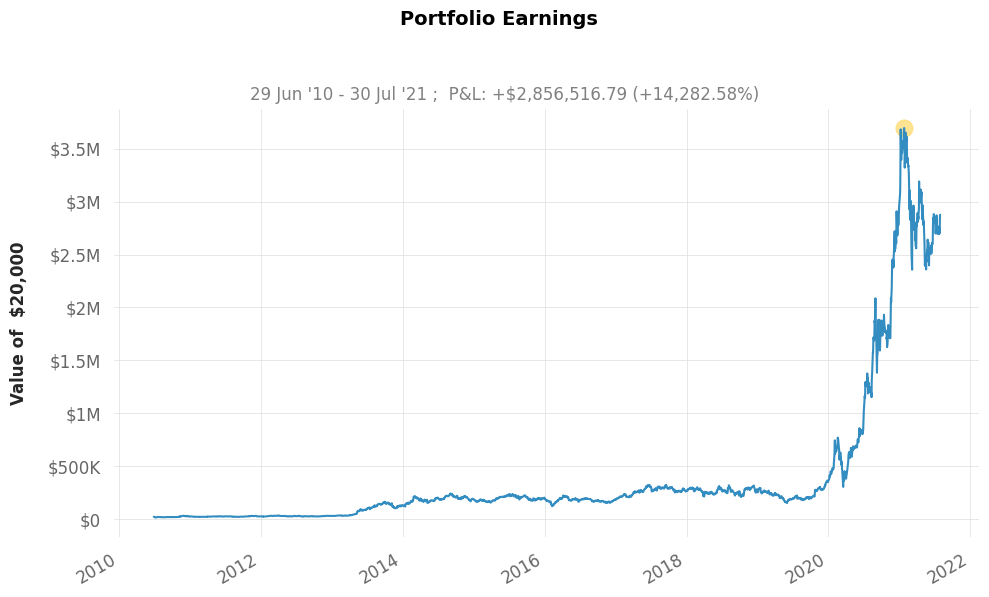

In [26]:
qs.plots.earnings(return_series,start_balance=20000)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


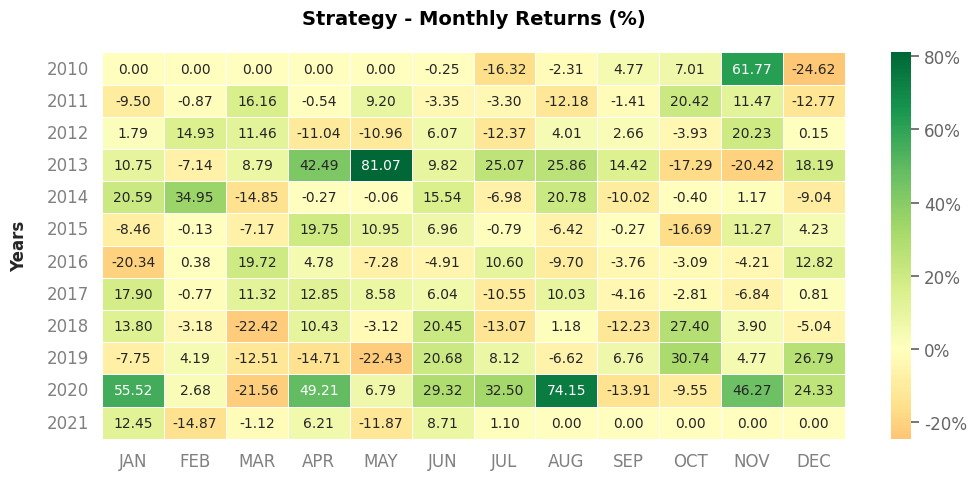

In [27]:
qs.plots.monthly_heatmap(return_series)

In [37]:
qs.reports.metrics(return_series)

                    Strategy
------------------  ----------
Start Period        2010-06-30
End Period          2021-07-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   14,282.58%
CAGR﹪              36.25%

Sharpe              1.08
Prob. Sharpe Ratio  99.99%
Sortino             1.67
Sortino/√2          1.18
Omega               1.22

Max Drawdown        -60.63%
Longest DD Days     939

Gain/Pain Ratio     0.22
Gain/Pain (1M)      1.36

Payoff Ratio        1.14
Profit Factor       1.22
Common Sense Ratio  1.41
CPC Index           0.72
Tail Ratio          1.16
Outlier Win Ratio   4.36
Outlier Loss Ratio  3.93

MTD                 1.1%
3M                  1.51%
6M                  -13.4%
YTD                 -2.62%
1Y                  129.2%
3Y (ann.)           77.36%
5Y (ann.)           47.54%
10Y (ann.)          39.32%
All-time (ann.)     36.25%

Avg. Drawdown       -9.41%
Avg. Drawdown Days  51
Recovery Factor     11.09
Ulcer Index         0.21
Serenity Index   

### Compare the Tesla returns with the SPY(Benchmark) returns

In [13]:
spy = pd.read_csv("custom_data/spy.csv")
spy.timestamp = pd.to_datetime(spy.timestamp)
spy.set_index('timestamp',inplace=True)
spy_return_series = spy['close'].pct_change()
spy_return_series

timestamp
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
                ...   
2021-07-26    0.002455
2021-07-27   -0.004558
2021-07-28   -0.000410
2021-07-29    0.004147
2021-07-30   -0.004856
Name: close, Length: 2914, dtype: float64

/home/yakub/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/yakub/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/yakub/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axi

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2021-07-30   2021-07-30
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          324.83%      14,318.80%
CAGR﹪                     9.43%        36.28%

Sharpe                     0.85         1.08
Prob. Sharpe Ratio         99.73%       99.99%
Smart Sharpe               0.85         1.07
Sortino                    1.19         1.67
Smart Sortino              1.19         1.66
Sortino/√2                 0.84         1.18
Smart Sortino/√2           0.84         1.18
Omega                      1.22         1.22

Max Drawdown               -34.1%       -60.63%
Longest DD Days            417          939
Volatility (ann.)          16.98%       56.42%
R^2                        0.16         0.16
Information Ratio          0.06         0.06
Calmar         

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-18,2020-06-05,107,-60.626539,-53.398658
2,2017-09-19,2019-06-03,2019-12-17,820,-53.514291,-49.940260
3,2014-09-05,2016-02-10,2017-03-31,939,-49.772756,-41.763386
4,2010-11-26,2011-02-23,2012-03-09,470,-38.455054,-37.383698
5,2013-10-01,2013-11-26,2014-02-07,130,-37.684233,-37.508402


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


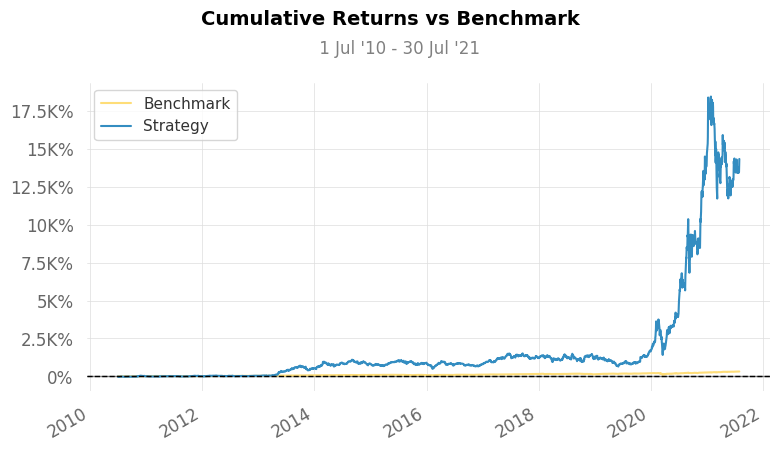

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


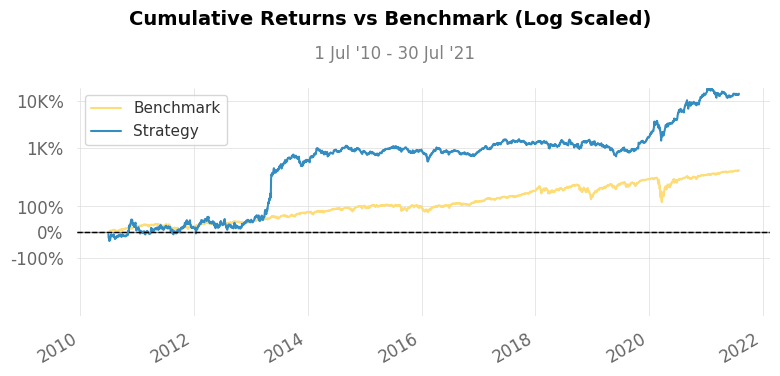

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


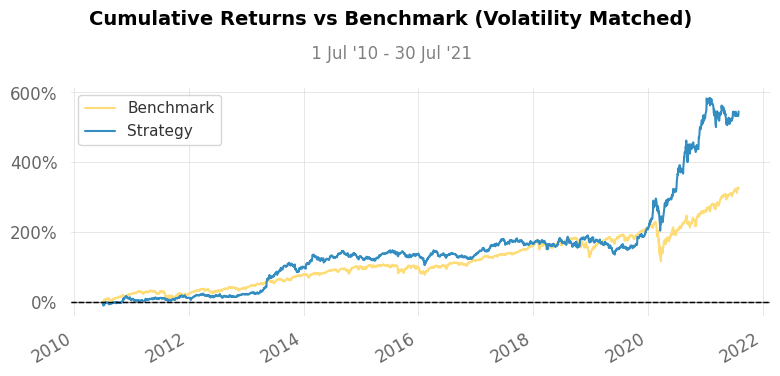

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


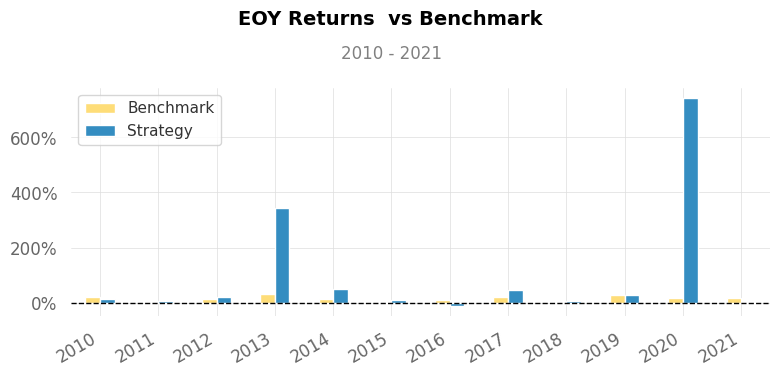

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


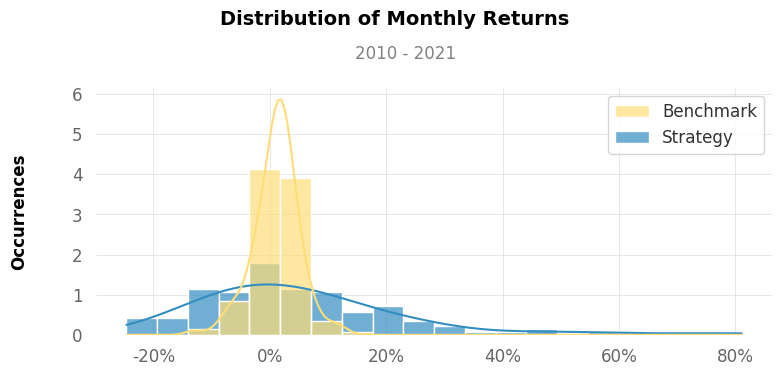

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


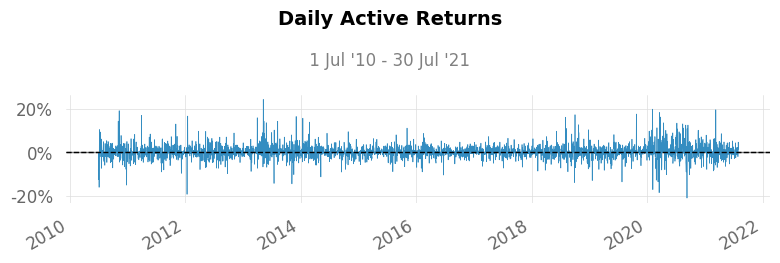

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


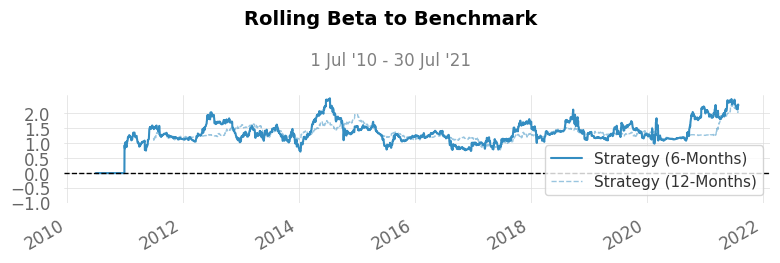

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


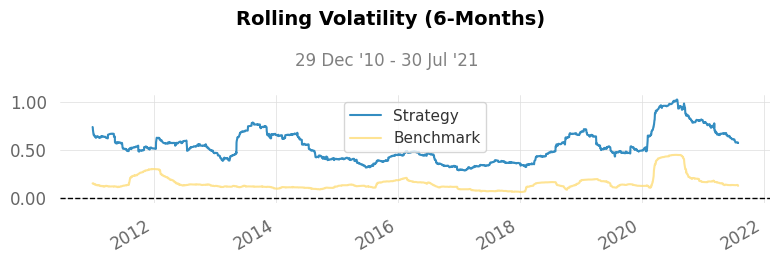

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


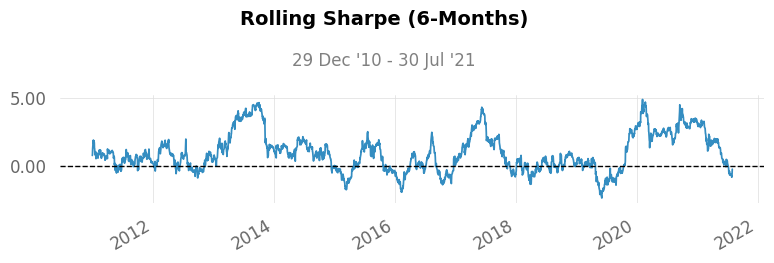

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


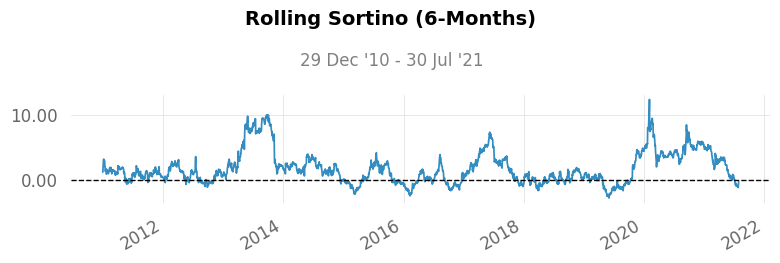

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


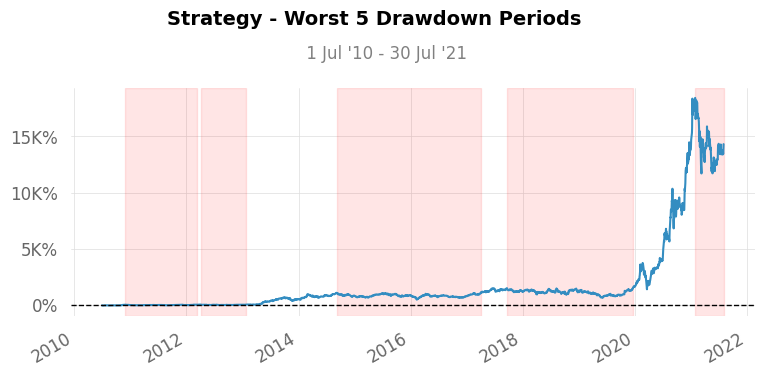

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


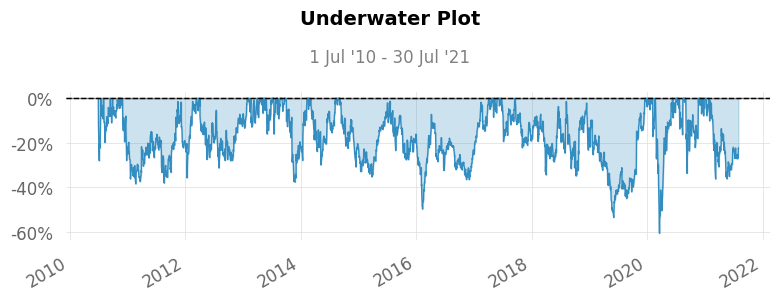

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


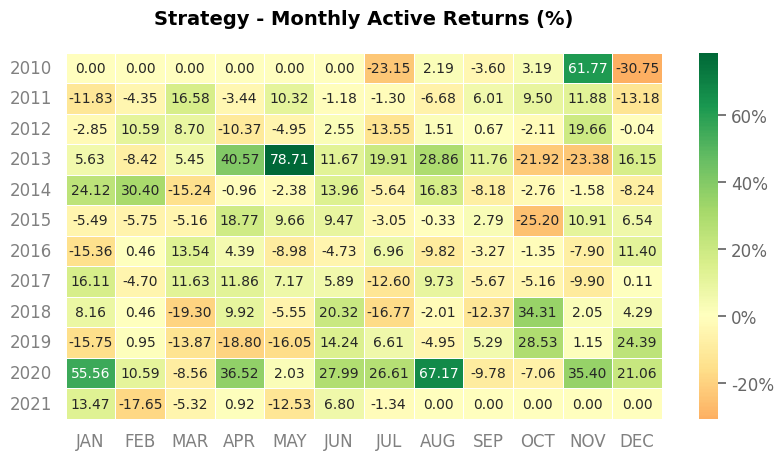

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


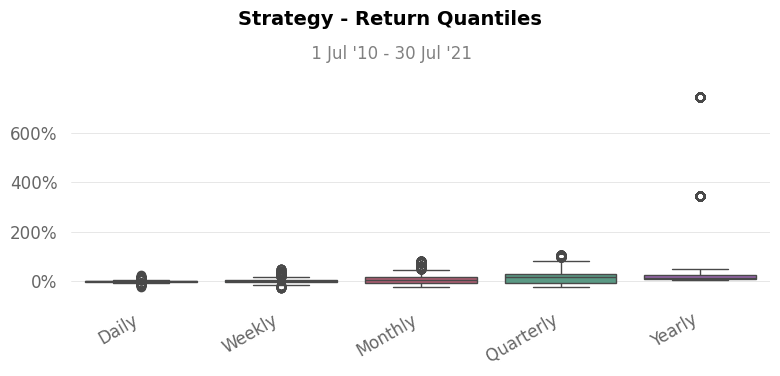

In [11]:
qs.reports.full(return_series,benchmark='spy_return_series')